## Final Project Submission

Please fill out:
* Student name: Annbellah Nduta
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


## Overview
 As a data scientist, I have been assigned with the task of assisting Microsoft in deciding which films to create. With me,I have movie datasets from Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers that I will use to come up with insights ensuring success of Microsoft in the entertainment industry.

## Business Understanding


## Importing Libraries
First we start by importing the relevant libraries and modules that I will use for the project's data analysis.

In [2]:

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile

## Data Understanding

In [3]:
with zipfile.ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip, path='ZippedData')

In [4]:
conn = sqlite3.connect('zippedData/im.db')
pd.read_sql("""
SELECT *
FROM sqlite_schema
WHERE type='table'
""", con)

NameError: name 'con' is not defined

# Lets First read data from each table

In [9]:
# movie_basics table
movie_basics = (""" 
SELECT *
FROM movie_basics
;""")
pd.read_sql(movie_basics,conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
# directors table
directors_table = ("""
SELECT *
FROM directors
;""")
pd.read_sql(directors_table,conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [ ]:
#known_for table 
known_for_table = ("""
SELECT *
FROM known_for
;""")
pd.read_sql(known_for_table,conn).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [ ]:
#movie_akas table
movie_akas_table = ("""
SELECT *
FROM movie_akas
;""")
pd.read_sql(movie_akas_table,conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [ ]:
#movie_ratings table
movie_ratings_table = ("""
SELECT *
FROM movie_ratings
;""")
pd.read_sql(movie_ratings_table,conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
#persons table 
persons_table = ("""
SELECT *
FROM persons
;""")
pd.read_sql(persons_table,conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [ ]:
#principals table 
principals_table = ("""
SELECT *
FROM principals
;""")
pd.read_sql(principals_table,conn).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [ ]:
#writers table
writers_table = ("""
SELECT *
FROM writers
;""")
pd.read_sql(writers_table,conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


## Understanding the 'tn.movie_budgets.csv.gz'

In [10]:
movie_budgets_df = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
#list of columns 
movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [12]:
#dataframe summary 
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Cleaning
I will be looking for gaps in the data set and making sure the data types are also in line with the respective columns.

In [13]:
# Number of null values in this dataframe
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no null values in the data set

In [14]:
#Column datatypes
movie_budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

All columns in this dataset are string(str) datatype but the production_budget, domestic_gross and worldwide_gross need to be changed to integer (int) datatype.

In [15]:
#Removing the dollar sign from the production_budget, worldwide_gross, domestic_gross columns converts their datatypes to float
movie_budgets_df["production_budget"] = movie_budgets_df["production_budget"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["worldwide_gross"] = movie_budgets_df["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["domestic_gross"] = movie_budgets_df["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


The values in the release_date column are float data type. We have to convert in order to use the data.

In [24]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5782 non-null   int64         
 1   release_date          5782 non-null   datetime64[ns]
 2   movie                 5782 non-null   object        
 3   production_budget     5782 non-null   float64       
 4   domestic_gross        5782 non-null   float64       
 5   worldwide_gross       5782 non-null   float64       
 6   return_on_investment  5782 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 316.3+ KB


In [34]:

movie_budgets_df['year'] = movie_budgets_df['release_date'].dt.year
movie_budgets_df['month'] = movie_budgets_df['release_date'].dt.month
movie_budgets_df['day'] = movie_budgets_df['release_date'].dt.day
#we print the updated dataframe
(movie_budgets_df)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,month,day
0,1,2009-01-01,Avatar,425000000.0,760507625.0,2.776345e+09,553.257713,2009,1,1
1,2,2011-01-01,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,154.667286,2011,1,1
2,3,2019-01-01,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-57.210757,2019,1,1
3,4,2015-01-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,324.384139,2015,1,1
4,5,2017-01-01,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,315.369636,2017,1,1
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-01-01,Red 11,7000.0,0.0,0.000000e+00,-100.000000,2018,1,1
5778,79,1999-01-01,Following,6000.0,48482.0,2.404950e+05,3908.250000,1999,1,1
5779,80,2005-01-01,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-73.240000,2005,1,1
5780,81,2015-01-01,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-100.000000,2015,1,1



## Data Analysis

Next I'm going to visualize the relationship between two variables: 'production_budget' and 'worldwide_gross' by a scatterplot.

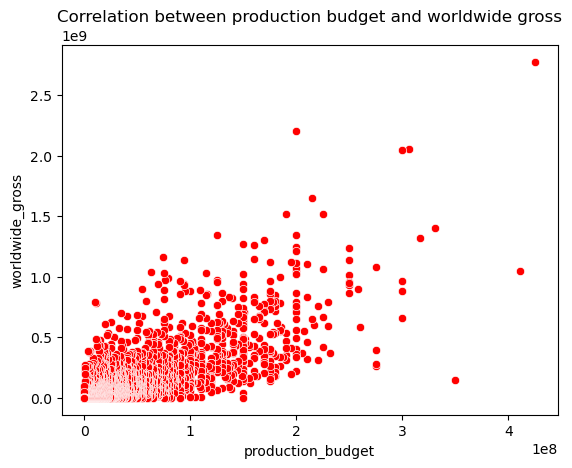

In [27]:
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budgets_df, color='red')
plt.title('Correlation between production budget and worldwide gross')
plt.savefig('scatterplot.png')  # Saving the plot as scatterplot.png
plt.show()

There is a positive relationship between production_budget and worldwide_gross.The positive relationship would imply that as the production budget of a movie increases, its worldwide gross also tends to increase. This suggests a potential correlation where higher investment in production often leads to higher returns in terms of gross revenue.

c:\Users\Bravado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


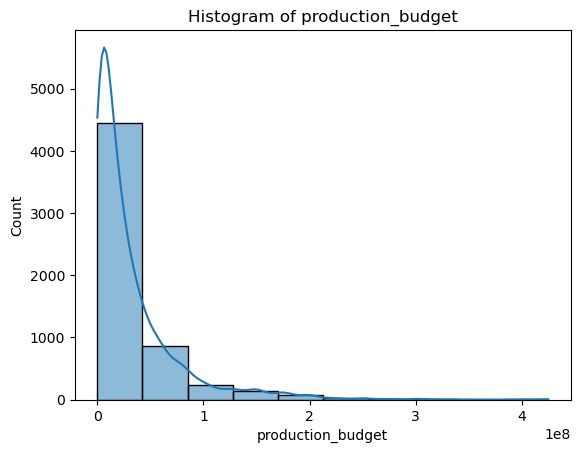

In [28]:
# Plot histogram with Seaborn
sns.histplot(movie_budgets_df['production_budget'], bins=10, kde=True)

# Set plot title and labels
plt.title('Histogram of production_budget')
plt.xlabel('production_budget')
plt.ylabel('Count')

plt.savefig('histogram.png') 

# Show the plot
plt.show()

The histogram plot visually illustrates how the count of movies is distributed across different production budgets, highlighting that more movies tend to have higher budgets.

## Return On Investment (ROI)
The return on investment (ROI) is a straightforward ratio obtained by dividing the net profit or loss of an investment by its initial cost. This measure, presented as a percentage, enables comparisons of the effectiveness or profitability of various investment options. My analysis focuses on the ROI of movies based on their release month.

In [26]:
#calculating and creating a new column in the dataframe named 'Return on Investment'
movie_budgets_df['return_on_investment'] = ((movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']) / movie_budgets_df['production_budget']) * 100
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,month,day
0,1,2009-01-01,Avatar,425000000.0,760507625.0,2.776345e+09,553.257713,2009,1,1
1,2,2011-01-01,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,154.667286,2011,1,1
2,3,2019-01-01,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-57.210757,2019,1,1
3,4,2015-01-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,324.384139,2015,1,1
4,5,2017-01-01,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,315.369636,2017,1,1


In [29]:
# Create a new column that contains the month that the movies were released
release_time = movie_budgets_df.copy()

release_time['release_month'] = release_time["release_date"].dt.strftime('%B').astype(str)
# we preview the updated DataFrame
release_time.head(10) 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,month,day,release_month
0,1,2009-01-01,Avatar,425000000.0,760507625.0,2.776345e+09,553.257713,2009,1,1,January
1,2,2011-01-01,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,154.667286,2011,1,1,January
2,3,2019-01-01,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-57.210757,2019,1,1,January
3,4,2015-01-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,324.384139,2015,1,1,January
4,5,2017-01-01,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,315.369636,2017,1,1,January
5,6,2015-01-01,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,571.016739,2015,1,1,January
6,7,2018-01-01,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,582.711400,2018,1,1,January
7,8,2007-01-01,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,221.140142,2007,1,1,January
8,9,2017-01-01,Justice League,300000000.0,229024295.0,6.559452e+08,118.648403,2017,1,1,January
9,10,2015-01-01,Spectre,300000000.0,200074175.0,8.796209e+08,193.206974,2015,1,1,January
